In [64]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

/home/test/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [32]:
#Read  data
data = pd.read_pickle("../data/train_data.pkl")
data

,air_store_id,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,...,2017-04-17,2017-04-18,2017-04-19,2017-04-20,2017-04-21,2017-04-22,air_genre_name,air_area_name,latitude,longitude
0,air_00a91d42b08b08d9,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,19,35,17,38,55,18,6,44,35.694003,139.753595
1,air_0164b9927d20bcc3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,2,1,8,1,26,6,6,62,35.658068,139.751599
2,air_0241aa3964b7f861,-1,-1,10,9,17,10,-1,5,8,...,12,19,8,-1,3,13,7,82,35.712607,139.779996
3,air_0328696196e46f18,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,3,-1,24,-1,19,8,4,98,34.701279,135.528090
4,air_034a3d5b40d5b1b1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,25,20,31,12,37,35,2,102,34.692337,135.472229
5,air_036d4f1ee7285390,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,6,32,52,18,29,23,2,31,34.799767,135.360073
6,air_0382c794b73b51ad,-1,-1,-1,-1,-1,-1,-1,-1,3,...,28,26,22,24,24,40,2,68,35.602125,139.671958
7,air_03963426c9312048,-1,-1,-1,62,30,52,37,89,60,...,37,26,23,25,75,57,7,15,34.386245,132.455018
8,air_04341b588bde96cd,10,-1,-1,23,35,33,52,47,71,...,31,34,35,8,47,45,7,66,35.735623,139.651658
9,air_049f6d5b402a31b2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,8,14,12,16,13,29,8,0,33.589216,130.392813


In [53]:
c = np.r_[1:479]
train_points = len(c) - input_seq_len - output_seq_len
print(train_points)
input_seqs = []
output_seqs = []
i = 0
inp_start = i + 1
inp_end = inp_start + input_seq_len
out_end = inp_end + output_seq_len 
input_seqs.append( data.iloc[: , inp_start:inp_end].values.reshape(1, -1, input_seq_len).transpose(0, 2, 1) )
output_seqs.append( data.iloc[: , inp_end:out_end].values.reshape(1, -1, output_seq_len).transpose(0, 2, 1) )
input_seqs[0]

369


array([[[-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, 10, ..., -1, -1, -1],
        ..., 
        [-1, -1, 37, ..., -1, -1, -1],
        [-1, -1, 10, ..., -1, -1, -1],
        [-1, -1, 13, ..., -1, -1, -1]]], dtype=int32)

In [55]:
np.concatenate(input_seqs)[0, :, 2]

array([-1, -1, 10,  9, 17, 10, -1,  5,  8, 16, 16,  8,  9,  4,  4, 29, 10,
        6,  7, 10, 14, 10,  3,  6,  7,  9,  6, -1,  1, 14, 11,  6,  3, 11,
       -1,  5, 16,  5,  9, 10, 22, -1,  8, 11,  7, 10, 12,  6, -1,  6, 22,
       25,  7,  6, 14, -1,  2, 37, 10, 13], dtype=int32)

In [75]:
data.applymap(lambda x: 0 if x==-1 else x)

,air_store_id,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,...,2017-04-17,2017-04-18,2017-04-19,2017-04-20,2017-04-21,2017-04-22,air_genre_name,air_area_name,latitude,longitude
0,air_00a91d42b08b08d9,0,0,0,0,0,0,0,0,0,...,19,35,17,38,55,18,6,44,35.694003,139.753595
1,air_0164b9927d20bcc3,0,0,0,0,0,0,0,0,0,...,2,1,8,1,26,6,6,62,35.658068,139.751599
2,air_0241aa3964b7f861,0,0,10,9,17,10,0,5,8,...,12,19,8,0,3,13,7,82,35.712607,139.779996
3,air_0328696196e46f18,0,0,0,0,0,0,0,0,0,...,3,0,24,0,19,8,4,98,34.701279,135.528090
4,air_034a3d5b40d5b1b1,0,0,0,0,0,0,0,0,0,...,25,20,31,12,37,35,2,102,34.692337,135.472229
5,air_036d4f1ee7285390,0,0,0,0,0,0,0,0,0,...,6,32,52,18,29,23,2,31,34.799767,135.360073
6,air_0382c794b73b51ad,0,0,0,0,0,0,0,0,3,...,28,26,22,24,24,40,2,68,35.602125,139.671958
7,air_03963426c9312048,0,0,0,62,30,52,37,89,60,...,37,26,23,25,75,57,7,15,34.386245,132.455018
8,air_04341b588bde96cd,10,0,0,23,35,33,52,47,71,...,31,34,35,8,47,45,7,66,35.735623,139.651658
9,air_049f6d5b402a31b2,0,0,0,0,0,0,0,0,0,...,8,14,12,16,13,29,8,0,33.589216,130.392813


In [76]:
def log_transform(data):
    data = data.applymap(lambda x: 0 if x==-1 else x)
    data.iloc[:, 1:479] = np.log1p(data.iloc[:, 1:479])
    return data

data = log_transform(data)
data.head()

,air_store_id,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,...,2017-04-17,2017-04-18,2017-04-19,2017-04-20,2017-04-21,2017-04-22,air_genre_name,air_area_name,latitude,longitude
0,air_00a91d42b08b08d9,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,2.995732,3.583519,2.890372,3.663562,4.025352,2.944439,6,44,35.694003,139.753595
1,air_0164b9927d20bcc3,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,1.098612,0.693147,2.197225,0.693147,3.295837,1.945910,6,62,35.658068,139.751599
2,air_0241aa3964b7f861,0.0,0.0,2.397895,2.302585,2.890372,2.397895,0.0,1.791759,2.197225,...,2.564949,2.995732,2.197225,0.000000,1.386294,2.639057,7,82,35.712607,139.779996
3,air_0328696196e46f18,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,1.386294,0.000000,3.218876,0.000000,2.995732,2.197225,4,98,34.701279,135.528090
4,air_034a3d5b40d5b1b1,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,3.258097,3.044522,3.465736,2.564949,3.637586,3.583519,2,102,34.692337,135.472229


In [77]:
def generate_walkforward_data(data, input_seq_len, output_seq_len, date_start_col, date_end_col, val_data=0.05):
    date_cols = np.r_[date_start_col: date_end_col]
    train_points = len(date_cols) - input_seq_len - output_seq_len
    input_seqs = []
    output_seqs = []
    for i in range(train_points+1):
        inp_start = i + date_start_col
        inp_end = inp_start + input_seq_len
        out_end = inp_end + output_seq_len 
        input_seqs.append( data.iloc[: , inp_start:inp_end].values.reshape(1, -1, input_seq_len).transpose(0, 2, 1) )
        output_seqs.append( data.iloc[: , inp_end:out_end].values.reshape(1, -1, output_seq_len).transpose(0, 2, 1) )
        
    input_seqs = np.concatenate(input_seqs)
    output_seqs = np.concatenate(output_seqs)
    
    train_x, val_x, train_y, val_y = train_test_split(input_seqs, output_seqs, test_size=val_data, random_state=786)
    
    return train_x, val_x, train_y, val_y


In [261]:
input_seq_len = 49
output_seq_len = 49
train_x, val_x, train_y, val_y = generate_walkforward_data(data, input_seq_len, output_seq_len, 1, 479)

print(train_x.shape, train_y.shape, val_x.shape, val_y.shape)

(361, 49, 821) (361, 49, 821) (20, 49, 821) (20, 49, 821)


In [274]:
## Parameters
import copy
learning_rate = 0.001
lambda_l2_reg = 0.00001

## Network Parameters
# size of LSTM Cell
hidden_dim = 64
# num of input signals
input_dim = 1
# num of output signals
output_dim = 1
# num of stacked lstm layers
num_stacked_layers = 2
# gradient clipping - to avoid gradient exploding
GRADIENT_CLIPPING = 20.0

def build_graph(feed_previous = False):
    tf.reset_default_graph()
    
    global_step = tf.Variable(0, name="global_step")
    
    weights = {'out': tf.get_variable("Weights_out", shape=[hidden_dim, output_dim] ,initializer=tf.truncated_normal_initializer())}
    biases  = {'out': tf.get_variable("Biases_out", shape=[output_dim], initializer=tf.constant_initializer(0))}
    
    with tf.variable_scope("Seq2Seq"):
        #Encoder - Inputs
        enc_inp = [tf.placeholder(tf.float32, shape=[None, input_dim], name='inp_{}'.format(i)) for i in range(input_seq_len)]
        
        #Decoder - Outputs
        target_seq = [tf.placeholder(tf.float32, shape=[None, output_dim], name='out_{}'.format(i)) for i in range(output_seq_len)]
        
        #Decoder inputs
        dec_inp = [tf.zeros_like(target_seq[0], dtype=tf.float32, name='go')] + target_seq[:-1]

        cells = []
        for i in range(num_stacked_layers):
            with tf.variable_scope('RNN_{}'.format(i)):
                cells.append(tf.contrib.rnn.LSTMCell(hidden_dim))
        cell = tf.contrib.rnn.MultiRNNCell(cells)
        
        def _rnn_decoder(decoder_inputs,
                        initial_state,
                        cell,
                        loop_function=None,
                        scope=None):
            """RNN decoder for the sequence-to-sequence model."""
            with tf.variable_scope(scope or "rnn_decoder"):
                state = initial_state
                outputs = []
                prev = None
                for i, inp in enumerate(decoder_inputs):
                    if loop_function is not None and prev is not None:
                        with tf.variable_scope("loop_function", reuse=True):
                            inp = loop_function(prev, i)
                    if i > 0:
                        tf.get_variable_scope().reuse_variables()
                    output, state = cell(inp, state)
                    outputs.append(output)
                    if loop_function is not None:
                        prev = output
            return outputs, state
 
        def _basic_rnn_seq2seq(encoder_inputs,
                              decoder_inputs,
                              cell,
                              feed_previous,
                              dtype=tf.float32,
                              scope=None):
            """Basic RNN sequence-to-sequence model"""
            with tf.variable_scope(scope or "basic_rnn_seq2seq"):
                enc_cell = copy.deepcopy(cell)
                _, enc_state = tf.contrib.rnn.static_rnn(enc_cell, encoder_inputs, dtype=dtype)
                if feed_previous:
                    return _rnn_decoder(decoder_inputs, enc_state, cell, _loop_function)
                else:
                    return _rnn_decoder(decoder_inputs, enc_state, cell)
 
        def _loop_function(prev, _):
            return tf.matmul(prev, weights['out']) + biases['out']
 
        dec_outputs, dec_memory = _basic_rnn_seq2seq(
            enc_inp,
            dec_inp,
            cell,
            feed_previous = feed_previous
        )
 
        reshaped_outputs = [tf.matmul(i, weights['out']) + biases['out'] for i in dec_outputs]

        
    with tf.variable_scope('Loss'):
        # L2 loss
        output_loss = 0
        for _y, _Y in zip(reshaped_outputs, target_seq):
            #output_loss += tf.reduce_mean(tf.multiply(tf.square(_y - _Y), tf.cast(_Y > 0, dtype=tf.float32)))
            output_loss += tf.reduce_mean(tf.square(_y - _Y))
        # L2 regularization (to avoid overfitting and to have a  better
        # generalization capacity)
        reg_loss = 0
        for tf_var in tf.trainable_variables():
            if 'Biases_' in tf_var.name or 'Weights_' in tf_var.name:
                reg_loss += tf.reduce_mean(tf.square(tf_var))

        loss = output_loss + lambda_l2_reg * reg_loss

    with tf.variable_scope('Optimizer'):
        optimizer = tf.contrib.layers.optimize_loss(
                loss=loss,
                learning_rate=learning_rate,
                global_step=global_step,
                optimizer='Adam',
                clip_gradients=GRADIENT_CLIPPING)
        
    saver = tf.train.Saver
    
    return dict(
        enc_inp = enc_inp,
        target_seq = target_seq,
        train_op = optimizer,
        loss=loss,
        saver = saver,
        reshaped_outputs = reshaped_outputs,
        )


In [275]:
total_iteractions = 250
batch_size = 16
KEEP_RATE = 0.5
train_losses = []
val_losses = []
 
rnn_model = build_graph(feed_previous=True)
 
init = tf.global_variables_initializer()

In [276]:
import os
with tf.Session() as sess:
 
    sess.run(init)
 
    for i in range(total_iteractions):
        idx = np.random.choice(len(train_x), batch_size)
        batch_input, batch_output = train_x[idx, :, 1], train_y[idx, :, 1]
 
        feed_dict = {rnn_model['enc_inp'][t]: batch_input[:,t].reshape(-1,input_dim) for t in range(input_seq_len)}
        feed_dict.update({rnn_model['target_seq'][t]: batch_output[:,t].reshape(-1,output_dim) for t in range(output_seq_len)})
        _, loss_t = sess.run([rnn_model['train_op'], rnn_model['loss']], feed_dict)
        print(loss_t)
 
    temp_saver = rnn_model['saver']()
    save_path = temp_saver.save(sess, os.path.join('./', 'univariate_ts_model0'))

print("Checkpoint saved at: ", save_path)

71.4328
58.5122
67.6492
37.2139
48.5147
60.5793
69.7178
46.9087
43.1355
29.3599
35.7514
36.8597
47.764
45.7852
44.8911
63.8034
47.4568
49.3525
36.8532
34.6189
53.55
41.8025
41.9855
41.6586
26.4626
35.3218
38.6917
30.7181
36.081
35.6219
52.4801
37.3011
28.3164
56.8763
25.685
39.1798
38.9903
35.1531
37.4511
38.1357
30.8339
45.5449
42.6855
42.6817
34.9826
49.2278
41.595
39.49
43.7773
29.2362
27.2401
45.6302
28.0799
36.4149
19.2775
42.7454
32.3059
48.8555
25.4746
15.3686
30.3565
24.7684
30.5046
47.8073
29.8909
30.9758
27.1336
35.3126
24.4507
28.9765
27.4936
36.6177
34.4527
18.8909
24.0175
36.7766
41.1554
37.4863
22.8393
43.3472
42.6846
36.0854
37.1261
31.8104
29.3833
38.0877
47.2678
42.2905
47.6955
25.6959
45.5249
28.758
30.6663
50.1438
41.7173
23.367
24.1254
26.8771
64.252
42.3563
36.1513
42.8798
21.0378
28.863
29.0719
29.6777
24.053
33.2187
54.7576
30.9616
49.2394
39.042
47.2192
46.7901
36.5021
38.9957
46.5064
14.1719
30.6768
39.7869
33.7967
47.4137
26.8349
28.1294
24.9936
50.4338
19.186

In [277]:
rnn_model = build_graph(feed_previous=True)
 
init = tf.global_variables_initializer()
with tf.Session() as sess:
 
    sess.run(init)
 
    saver = rnn_model['saver']().restore(sess, os.path.join('./', 'univariate_ts_model0'))
 
    feed_dict = {rnn_model['enc_inp'][t]: val_x[-1, t, 1].reshape(1,input_dim) for t in range(input_seq_len)}
    feed_dict.update({rnn_model['target_seq'][t]: np.zeros([1, output_dim]) for t in range(output_seq_len)})
    final_preds = sess.run(rnn_model['reshaped_outputs'], feed_dict)
    print(len(final_preds))
    final_preds = np.concatenate(final_preds)


INFO:tensorflow:Restoring parameters from ./univariate_ts_model0
49


In [278]:
final_preds.shape

(49, 1)

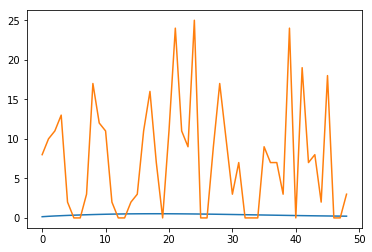

In [279]:
plt.plot(np.exp(final_preds[:, 0]) - 1)
plt.plot(np.exp(val_y[-1, :, 1]) -1)
plt.show()

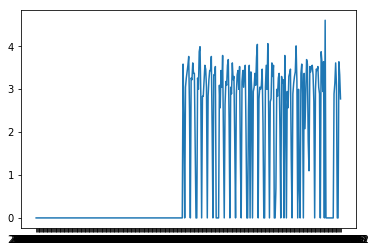

In [280]:
plt.plot(data.iloc[0, 1:379])
plt.show()